# Quantile Regression: Introduction
With regression data $(X_i, Y_i)\in\mathbb{R}^p\times\mathbb{R}, 1\le i\le n$, the $L_1$-regression (or median regression) is defined by 
\begin{equation*}
\widehat{\beta} = \operatorname{argmin}_{\theta\in\mathbb{R}^p}\sum_{i=1}^n |Y_i - X_i^{\top}\theta|.
\end{equation*}
If $(X_i, Y_i), 1\le i\le n$ are independent and identically  $Y_i = X_i^{\top}\beta_0 + \varepsilon_i$, where $\varepsilon_i$'s are independent of $X_i$'s and further if the distribution function $F(\cdot)$ of $\varepsilon_i$'s satisfies $F(0) = 1/2$ and $F'(0) = \lambda > 0$, then
\begin{equation*}
\left(\sum_{i=1}^n X_iX_i^{\top}\right)^{1/2}(\widehat{\beta} - \beta_0) \overset{d}{\to} N(0, (2\lambda)^{-2}I).
\end{equation*}
The distribution as well as the rate of convergence differ if the errors has non-identical distributions and/or do not have a non-zero derivative at zero. General results of these cases are discussed in Knight (1999, Asymptotics for $L_1$-Estimators of Regression Parameters under Heteroscedasticity). We describe two specific examples here; we will continue to assume that $\varepsilon_i$'s are independent of $X_i$'s. Let $F_i(x) = \mathbb{P}(\varepsilon_i \le x)$.
## Example 1 of Knight (1999)
Suppose that $Y_i = \beta_0 + \beta_1X_i + \varepsilon_i$, where $X_i\sim\mbox{Unif}(-1, 1)$ and $F_i(\cdot)$ satisfies
\begin{equation*}
F_i(x) - F_i(0) = \lambda i^{\gamma}x(1 + r(x))\quad\mbox{for some}\quad \gamma > -1/2,
\end{equation*}
and a function $r(\cdot)$ such that $r(x) \to 0$ as $x\to\infty$. Then Example 1 of Knight (1999) yields
\begin{equation*}
n^{\gamma + 1/2}(\widehat{\beta} - \beta) \overset{d}{\to} \frac{\lambda + 1}{2\lambda}\mathbf{W},
\end{equation*}
where $\mathbf{W} = (W_0, W_1)$ is a bivariate normal random vector with marginal variances of $1$ and $3$.

Now let us consider the case where $F_i(\cdot)$ is not differentiable at zero: for some $\alpha > 0$ and $\gamma > \max\{-1, -1/(2\alpha)\}$,
\begin{equation*}
F_i(x) - F_i(0) = \lambda i^{\gamma}\mbox{sgn}(x)|x|^{\alpha}(1 + r(x)),
\end{equation*}
for some $r(\cdot)$ such that $r(x)\to0$ as $x\to0$. Then
\begin{equation*}
n^{\gamma + 1/(2\alpha)}(\widehat{\beta} - \beta) \overset{d}{\to} \operatorname{argmin}_{(u_0, u_1)} Z(u_0, u_1),
\end{equation*}
where
\begin{equation*}
Z(u_0, u_1) = -(u_0W_0 + u_1W_1) + \frac{\lambda\{|u_0 + u_1|^{\alpha + 1}(u_0 + u_1) - |u_0 - u_1|^{\alpha + 1}(u_0 - u_1)\}}{u_1(\alpha + 1)(\alpha + 2)(\gamma + 1)}.
\end{equation*}

In practice, $\gamma$ and $\alpha$ are unknown in practice and the limiting distribution as well as the rate of convergence depend on these unknown parameters. Further, as proved in Section 3 of Knight (1999), bootstrap is valid if and only if the limiting distribution is normal. One can consider subsampling as an alternative but this requires knowledge of the rate of convergence of the estimator. Bertail, Politis, and Romano (1999, On Subsampling Estimators with Unknown Rate of Convergence) provides an estimate of the rate of convergence and implements subsampling. On the other hand, for the one-dimensional case, validity of HulC can be proved without any requirements on the distribution of the errors. This was suggested in Kuchibhotla (2021, Median bias of M-estimators).
## Applicability of HulC
Suppose $(X_i, Y_i)\in\mathbb{R}^2, 1\le i\le n$ are independent and identically distributed random vectors. Define
\begin{equation*}
\widehat{\beta} := \operatorname{argmin}_{\theta\in\mathbb{R}} \sum_{i=1}^n |Y_i - \theta X_i|.
\end{equation*}
Note that the objective function is a convex function of $\theta$. Setting $\mathbb{M}_n(\theta) = \sum_{i=1}^n |Y_i - \theta X_i|$, it follows that
\begin{equation*}
\{\widehat{\theta}_n \ge \theta_0\} = \{\dot{\mathbb{M}}_n(\theta_0) \le 0\}\quad\mbox{and}\quad \{\widehat{\theta}_n \le \theta_0\} = \{\dot{\mathbb{M}}_n(\theta_0) \ge 0\}.
\end{equation*}
Because $\dot{\mathbb{M}}_n(\theta_0)$ is a sum of mean zero independent bounded random variables and hence by CLT, $\mathbb{P}(\dot{\mathbb{M}}_n(\theta_0) \ge 0) \to 1/2$ and $\mathbb{P}(\dot{\mathbb{M}}_n(\theta_0) \le 0) \to 1/2$ as $n\to\infty$.

In terms of computation, we note that $\mathbb{M}_n(\theta) = \sum_{i=1}^n |X_i||Y_i/X_i - \theta|$, and hence the minimizer is a weighted median.

## Simulation Setting
Suppose $X_i\sim\mbox{Unif}[-1, 1]$ and let $Y_i = X_i + \varepsilon_i$ where $\varepsilon_i$ and $X_i$ are independent and $F_i(x) = \mathbb{P}(\varepsilon_i \le x) = 0.5(1 + \mbox{sgn}(x)|x|^{\alpha}), x\in[-1, 1]$, for some $\alpha > 0$. If $\alpha = 1$, then this is the classical setting of error distribution with density bounded away from zero. If $\alpha < 1$, then the rate of convergence of the quantile estimator is faster than $n^{1/2}$ and if $\alpha > 1$, then the rate of convergence is slower than $n^{1/2}$.

In the following, we generate data for values of $\alpha \in (0, 2]$ and compare the performance of HulC and subsampling with estimated rate of convergence. We do not compare to bootstrap as it is known to be inconsistent for all $\alpha \neq 1$.

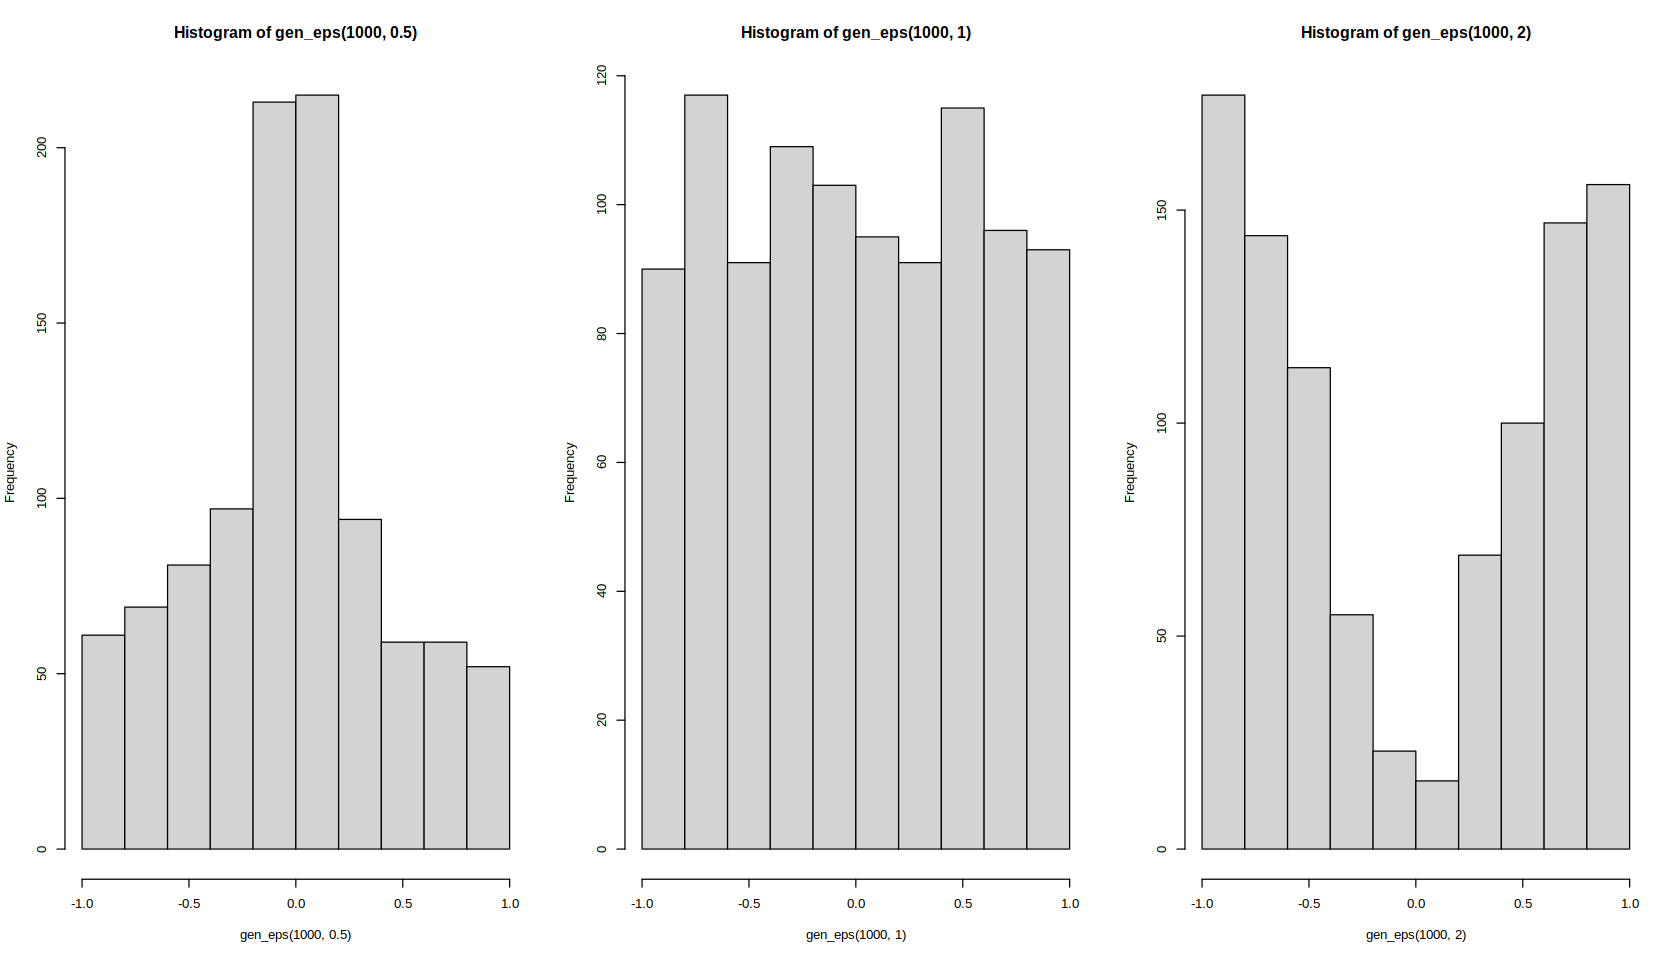

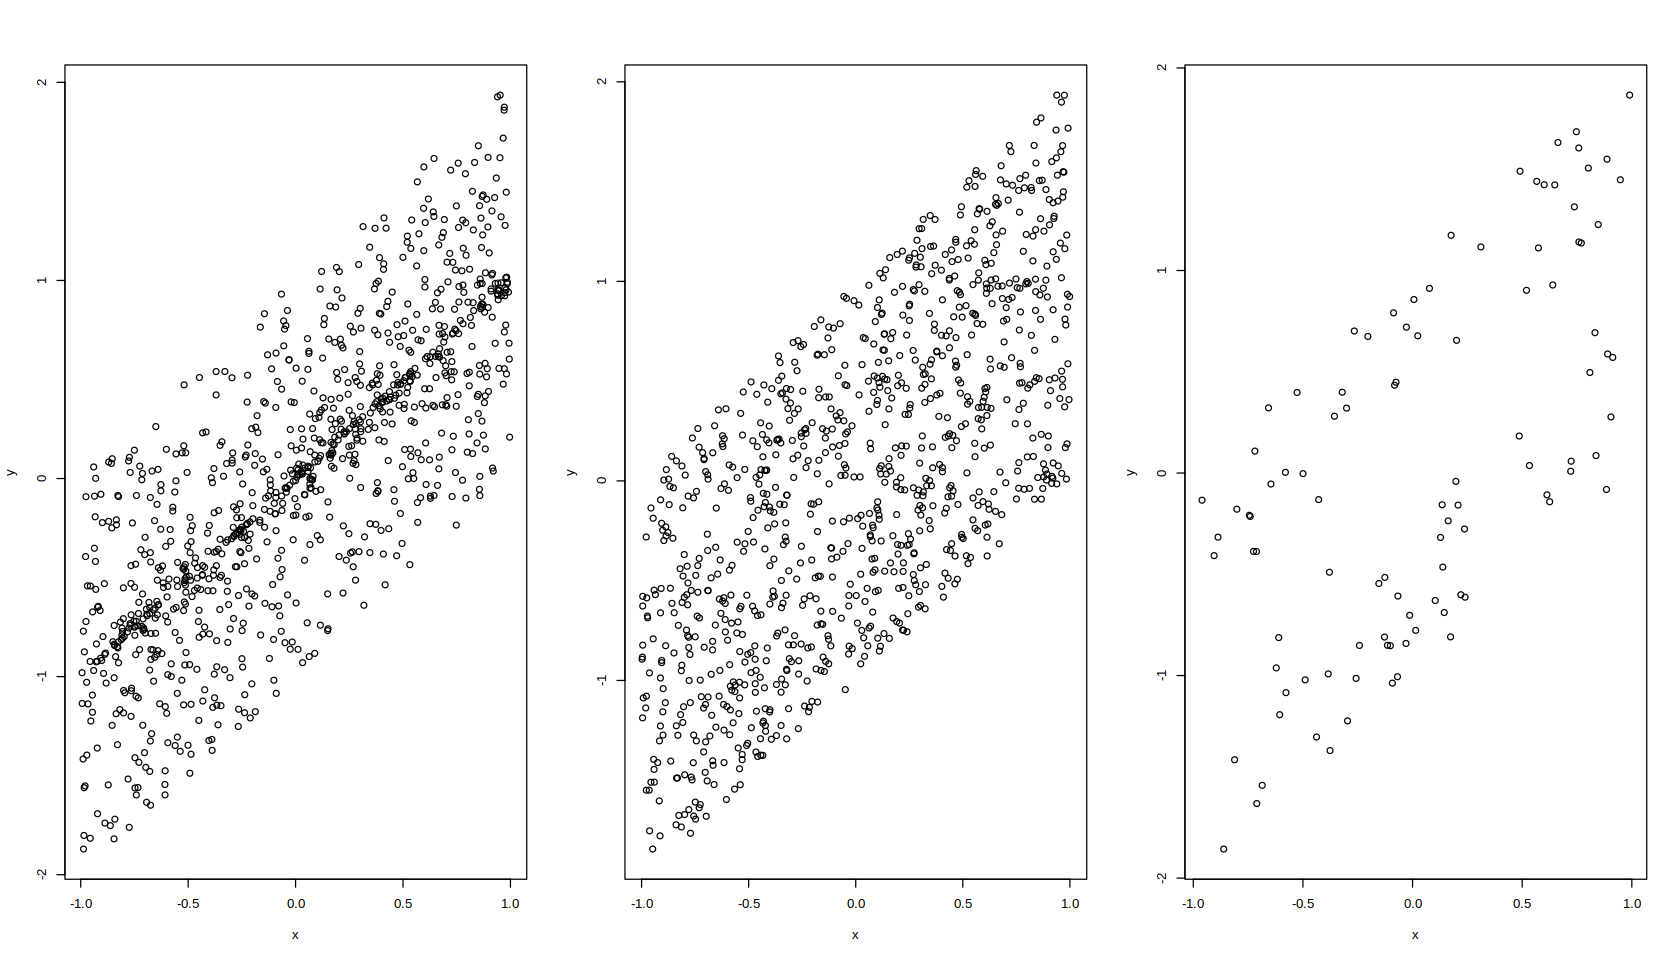

In [1]:
## First, we estimate the median bias of the 
## quantile regression estimator for different values of alpha.

## Generating epsilon_i's for different values of alpha.
gen_eps <- function(n, alpha){
    u <- runif(n)
    x <- 2*u - 1
    x <- abs(x)^{1/alpha}*sign(x)
    return(x)
}

gen_data <- function(n, alpha){
    eps <- gen_eps(n, alpha)
    x <- runif(n, -1, 1)
    y <- x + eps
    dat <- cbind(x, y)
    colnames(dat) <- c("x", "y")
    dat <- as.data.frame(dat)
    return(dat)
}

options(repr.plot.width=14, repr.plot.height=8)
par(mfrow = c(1, 3))
hist(gen_eps(1000, 0.5))
hist(gen_eps(1000, 1))
hist(gen_eps(1000, 2))
par(mfrow = c(1, 3))
tmp <- gen_data(1000, 0.5)
plot(tmp$x, tmp$y, xlab = "x", ylab = "y")
tmp <- gen_data(1000, 1)
plot(tmp$x, tmp$y, xlab = "x", ylab = "y")
tmp <- gen_data(100, 2)
plot(tmp$x, tmp$y, xlab = "x", ylab = "y")

In [2]:
library("Hmisc")
### Replace Fun with statistic of interest
Fun <- function(dat){
    x <- dat$x
    y <- dat$y
    wts <- abs(x)/sum(abs(x))
    out <- quantile(y/x, weights = wts, probs = 1/2, na.rm = TRUE, normwt = TRUE)
    return(out)
}
nsamp_seq <- c(50, 100, 250, 500, 1000, 2000, 5000, 10000)
alpha_seq <- seq(0.1, 2, length = 100)
nrep <- 200
grid_new <- expand.grid(nsamp = nsamp_seq, alpha = alpha_seq, rep = 1:nrep, estimate = 0)
for(idx in 1:nrow(grid_new)){
    dat <- gen_data(grid_new$nsamp[idx], grid_new$alpha[idx])
    grid_new$estimate[idx] <- Fun(dat)
}


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units





Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'nsamp'. You can override using the
`.groups` argument.


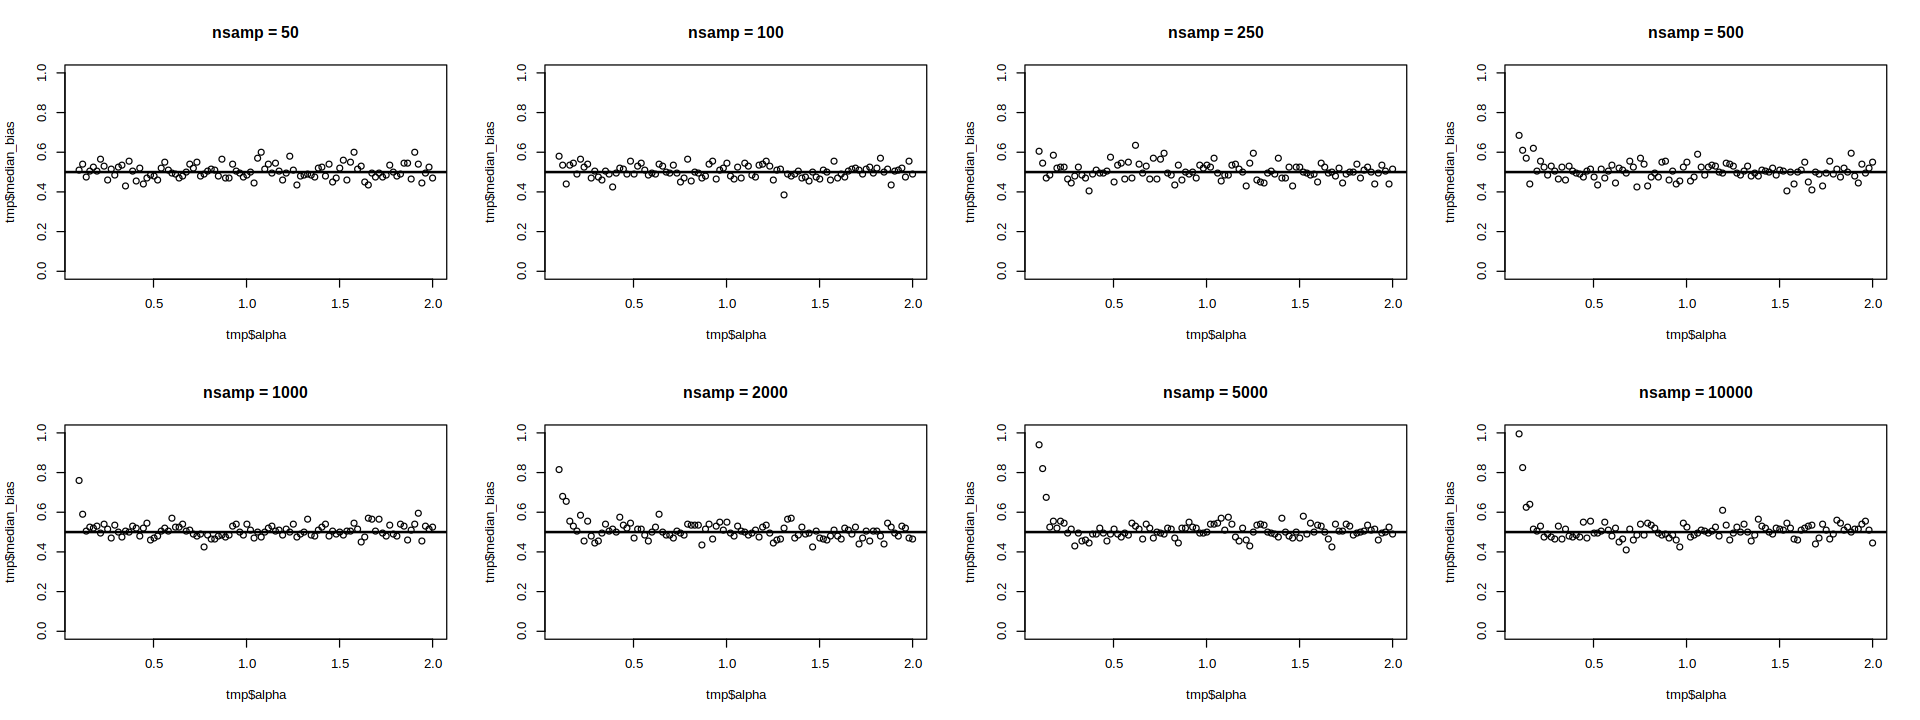

In [3]:
library("dplyr")
library("ggplot2")
median_bias_est <- grid_new %>% group_by(nsamp, alpha) %>% summarize(median_bias = mean(estimate <= 1))
options(repr.plot.width=16, repr.plot.height=6)
par(mfrow = c(2, 4))
for(idx in 1:8){
    tmp <- median_bias_est[which(median_bias_est$nsamp == nsamp_seq[idx]),]
    plot(tmp$alpha, tmp$median_bias, main = paste0("nsamp = ", nsamp_seq[idx]), ylim = c(0, 1))
    abline(h = 0.5, lwd = 2)
}

In [4]:
solve_for_B <- function(alpha = 0.05, asymmetry = 0, dim = 1){
  B_low <- floor(log(2*dim/alpha, base = 2))
  B_up <- ceiling(log(2*dim/alpha, base = 2/(1 + 2*asymmetry)))
  for(B in B_low:B_up){
    if((1/2 + asymmetry)^B + (1/2 - asymmetry)^B <= alpha)
      break
  }
  return(B)
}

HulC1d <- function(data, estimate, alpha = 0.05, Delta = 0, randomize = TRUE){
  nn <- nrow(data)
  data <- data[sample(nn),,drop=FALSE]
  B1 <- solve_for_B(alpha = alpha, asymmetry = Delta)
  B <- B1
  if(randomize){
    p1 <- (1/2 + Delta)^B1 + (1/2 - Delta)^B1
    B0 <- B1 - 1
    p0 <- (1/2 + Delta)^B0 + (1/2 - Delta)^B0
    U <- runif(1)
    tau <- (alpha - p1)/(p0 - p1)
    B <- B0*(U <= tau)+ B1*(U > tau)
  }
  if(B > nn){
    print(paste0("Delta = ", Delta, ", No. of splits = ", B, ", Sample size = ", nn))
    stop("Error: not enough samples for splitting!")
  }
  ci_est <- rep(0, B)
  TMP <- split(1:nn, sort((1:nn)%%B))
  for(idx in 1:B){
    ci_est[idx] <- estimate(data[TMP[[idx]],,drop=FALSE])
  }
  CI <- range(ci_est)
  names(CI) <- c("lwr", "upr")
  ret <- list(CI = CI, median.bias = Delta, B = B)
  return(ret)
}
### Code for subsampling with estimated rate of convergence
### Following code was written by Larry Wasserman
Subsample = function(dat,b,N,tgrid,gamma=0){
    ### b = subsample size
    ### N = number of subsamples
    ### tgrid = grid of values on which to evaluate the inverse cdf
    ### gamma:  root = n^gamma (theta.hat - theta)
    ### Note: set gamma = 0 to get the unnormalized root:  (theta.hat - theta)
    ###
    ### return: G^{-1}(t) for t in tgrid
    ###         where G(x) = P( n^gamma (theta.hat-theta) < = x)

    gridsize = 100
    n = nrow(dat)
    theta.hat = Fun(dat)
    tmp = rep(0,N)
    for(i in 1:N){
        I = sample(1:n,size=b,replace=FALSE)
        xx = dat[I,,drop=FALSE]
        tmp[i] = Fun(xx)
    }
    xx = b^gamma*(tmp - theta.hat)
    xgrid = seq(min(xx),max(xx),length=gridsize)
    G = rep(0,gridsize)
    for(i in 1:gridsize){
        G[i] = mean(b^gamma*(tmp - theta.hat) <= xgrid[i])
    }
    ### invert cdf
    out = rep(0,length(tgrid))
    for(i in 1:length(tgrid)){
        out[i] = min(xgrid[G >= tgrid[i]])
    }
    return(out)
}

Estimate_Rate = function(dat,beta,N){
    ### 1 > beta_1 > ... > beta_I > 0
    n = nrow(dat)
    I = length(beta)
    tgrid = c(.1,.6,.2,.7,.3,.8,.4,.9)  ##suggested grid
    J = 4
    y = matrix(0,I,J)
    even = c(2,4,6,8)
    odd  = c(1,3,5,7)
    b = rep(0,I)
    for(i in 1:I){
        b[i] = round(n^beta[i])
        tmp = Subsample(dat,b[i],N,tgrid)
        y[i,] = log(tmp[even] - tmp[odd])
    }
    y = apply(y,1,mean)
    ybar = mean(y)
    alpha = -sum((y-ybar)*(log(b)-mean(log(b))))/sum( (log(b)-mean(log(b)))^2)
    if(is.nan(alpha)){
        alpha <- 0
    }
    return(alpha)
}


Confidence_Interval = function(dat,b,N=150,alpha,beta=(9:1)/10){
    ### 1 > beta_1 > ... > beta_I > 0
    n = nrow(dat)
    theta.hat = Fun(dat)
    tgrid = c(alpha/2,1-alpha/2)
    gamma.hat = Estimate_Rate(dat,beta,N)
    tmp = Subsample(dat,b,N,tgrid,gamma=gamma.hat)
    left  = theta.hat - tmp[2]/n^gamma.hat
    right = theta.hat - tmp[1]/n^gamma.hat
    return(c(left,right,gamma.hat))
}

nrep <- 200
nsamp_seq <- c(50, 100, 250, 1000)
alpha_seq <- c(seq(0.1, 0.9, length = 3), 1, seq(1.1, 2, length = 3))
methods <- c("HulC", "Subsample (1/3)", "Subsample (1/2)", "Subsample (2/3)")
grid_new <- expand.grid(rep = 1:nrep, method = methods, nsamp = nsamp_seq, alpha = alpha_seq, width = 0, coverage = 0)

In [5]:
for(idx in 1:nrow(grid_new)){
    if(idx %% 5000 == 0){
        print(idx)
    }
    dat <- gen_data(grid_new$nsamp[idx], alpha = grid_new$alpha[idx])
    if(grid_new$method[idx] == "HulC"){
        CI <- HulC1d(dat, Fun, alpha = 0.05, Delta = 0.0)$CI
    }
    if(grid_new$method[idx] == "Subsample (1/3)"){
        CI <- Confidence_Interval(dat, round(grid_new$nsamp[idx]^{1/3}), alpha = 0.05)[1:2]
    }
    if(grid_new$method[idx] == "Subsample (1/2)"){
        CI <- Confidence_Interval(dat, round(grid_new$nsamp[idx]^{1/2}), alpha = 0.05)[1:2]
    }
    if(grid_new$method[idx] == "Subsample (2/3)"){
        CI <- Confidence_Interval(dat, round(grid_new$nsamp[idx]^{2/3}), alpha = 0.05)[1:2]
    }
    grid_new$width[idx] <- abs(diff(CI))
    grid_new$coverage[idx] <- (prod(CI - 1) <= 0)
}

[1] 5000
[1] 10000
[1] 15000
[1] 20000


In [6]:
save(grid_new, file = "quantile_reg_HulC_subsamp_four_sample_sizes.RData")

In [7]:
avg_width_cov <- grid_new %>% 
                    group_by(nsamp, alpha, method) %>% 
                    summarize(mean_coverage = mean(coverage), mean_width = mean(width))
print(avg_width_cov)

`summarise()` has grouped output by 'nsamp', 'alpha'. You can override using
the `.groups` argument.


# A tibble: 112 × 5
# Groups:   nsamp, alpha [28]
   nsamp alpha method          mean_coverage mean_width
   <dbl> <dbl> <fct>                   <dbl>      <dbl>
 1    50   0.1 HulC                    0.96      0.0233
 2    50   0.1 Subsample (1/3)         0.995     0.649 
 3    50   0.1 Subsample (1/2)         0.855     0.0969
 4    50   0.1 Subsample (2/3)         0.76      0.0148
 5    50   0.5 HulC                    0.935     0.736 
 6    50   0.5 Subsample (1/3)         0.965     0.588 
 7    50   0.5 Subsample (1/2)         0.97      0.459 
 8    50   0.5 Subsample (2/3)         0.975     0.315 
 9    50   0.9 HulC                    0.955     1.39  
10    50   0.9 Subsample (1/3)         0.89      1.32  
# ℹ 102 more rows


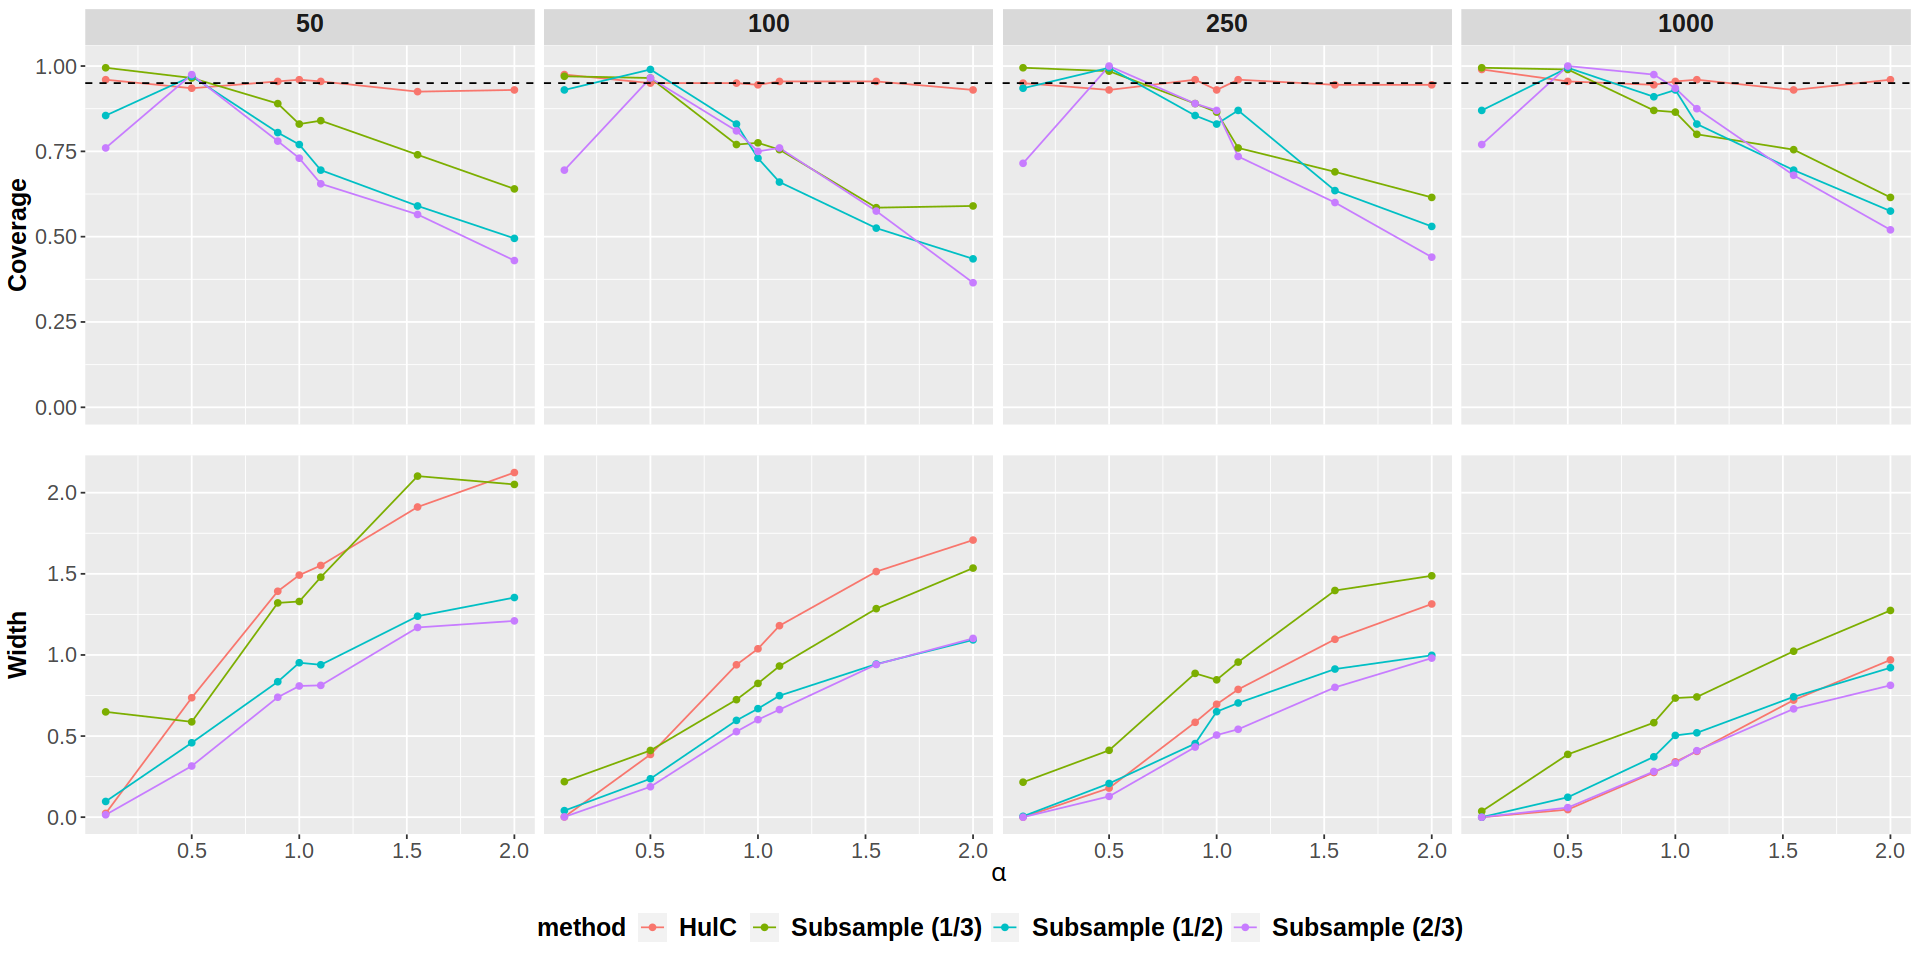

In [10]:
options(repr.plot.width=16, repr.plot.height=8)
library("ggplot2")
library(latex2exp)
library(patchwork)
p1 <- ggplot(avg_width_cov, aes(x = alpha, y=mean_coverage, group = method)) + 
        facet_wrap(~nsamp, nrow = 1) +
        geom_line(aes(y = mean_coverage, color = method), linewidth = 0.5) +
        geom_point(aes(y = mean_coverage, color = method)) + ylab('Coverage') + xlab('') +
        # theme(legend.position="bottom") + 
        theme(plot.margin=unit(c(0,0,0,-.2), "cm"),
            axis.text.x=element_blank(),
            axis.ticks.x = element_blank(),
            axis.text.y=element_text(size=13),
            axis.text=element_text(size=12),
            axis.title=element_text(size=15,face="bold"),
            strip.text = element_text(size=15,face = "bold") ) +
        ylim(c(0.0,1.01)) +
        geom_hline(data = data.frame(yint=1-0.05, type="Coverage"), aes(yintercept = yint), linetype = "dashed")

p2 <- ggplot(data = avg_width_cov, aes(x = alpha, y = mean_width, group = method)) +
        facet_wrap(. ~ nsamp, nrow = 1) +
        geom_line(aes(y = mean_width, color = method), linewidth = 0.5)  +
        geom_point(aes(y = mean_width, color = method)) + 
        ylab('Width') + 
        xlab(TeX('$\\alpha$')) +
        theme(plot.margin=unit(c(0,0,0,-.2), "cm"),
            strip.background.x = element_blank(),
            axis.text.x=element_text(size = 13),
            axis.text.y=element_text(size=13),
            axis.text=element_text(size=12),
            strip.text.x = element_blank(),    
            axis.title=element_text(size=15,face="bold"),
            strip.text = element_text(size=15,face = "bold") ) 
# + 
#         geom_hline(data = data.frame(yint=1-0.05, type="Coverage"), aes(yintercept = yint), linetype = "dashed")
(p1 / p2) + plot_layout(guides = "collect", ncol = 1) & theme(legend.position = 'bottom', legend.text=element_text(size=15, face = "bold"), legend.title=element_text(size = 15, face = "bold"))